In [11]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-2, 3, 0.1)
y = -x + 0.2 * x ** 2 - 0.5 * np.sin(4*x) + np.cos(2*x)

t = 0
b = lambda x: np.mean(x, axis=0)
H = lambda y: np.square(y.mean() - y).sum()
IG = 0
th = 0
for t in x:
    R1 = np.sum(x < t)
    R2 = np.sum(x >=t)
    if R1 == 0 or R2 == 0:
        continue
    # print(R1, R2, t)
    y_0 = y[x < t]
    y1 = y[x >= t]
    HR1 = H(y_0)
    HR2 = H(y1)
    R0 = len(x)
    IG_ = H(y) - R1 / R0 * HR1 - R2 / R0 * HR2
    if IG < IG_:
        IG = IG_
        th = t

IG, th

(np.float64(76.60995066602564), np.float64(0.40000000000000213))

AxisError: axis 0 is out of bounds for array of dimension 0

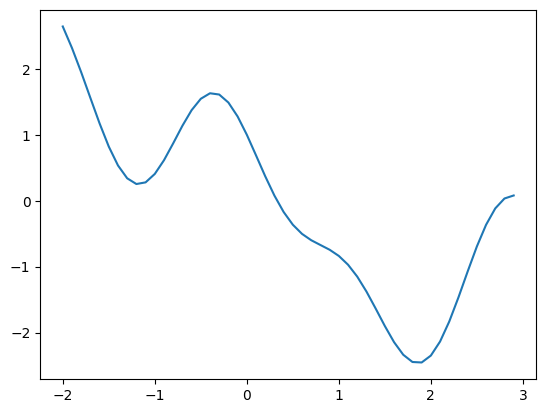

In [12]:
plt.plot(x, y)
lplot = [x * 0.1 for x in range(-20, 0)]
rplot = [x*0.1 for x in range(0, 30)]
plt.plot(lplot, [b(y) for y in y_0])
plt.plot(rplot, [b(y) for y in y1])

In [ ]:
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt

x = np.arange(-2, 3, 0.1).reshape(-1, 1)
y = 0.3 * x ** 2 - 0.2 * x ** 3 - 0.5 * np.sin(4*x)

clf = tree.DecisionTreeRegressor(max_depth=4)
clf.fit(x, y)
pr_y = np.array(clf.predict(x))
Q = np.sum([(pr - y) ** 2 for pr, y in zip(pr_y, y)]) / len(y)
plt.plot(x, y)
plt.plot(x, pr_y)
pr_y.shape, y.shape

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

X = np.array([(300, 200), (320, 180), (400, 100), (430, 65), (64, 150), (84, 112), (106, 90), (154, 64), (192, 62), (220, 82), (244, 92), (271, 111), (275, 137), (286, 161), (56, 178), (80, 156), (101, 131), (123, 104), (155, 94), (191, 100), (242, 70), (231, 114), (272, 95), (261, 131), (299, 136), (308, 124), (128, 78), (47, 128), (47, 159), (137, 186), (166, 228), (171, 250), (194, 272), (221, 287), (253, 292), (308, 293), (332, 280), (385, 256), (398, 237), (413, 205), (435, 166), (447, 137), (422, 126), (400, 154), (389, 183), (374, 214), (358, 235), (321, 250), (274, 263), (249, 263), (208, 230), (192, 204), (182, 174), (147, 205), (136, 246), (147, 255), (182, 282), (204, 298), (252, 316), (312, 321), (349, 313), (393, 288), (417, 259), (434, 222), (443, 187), (463, 174), (420, 90)])
Y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=4)

clf_tree.fit(X, Y)

predict = clf_tree.predict(X)
Q = np.mean(predict == Y)
Q